# Enfoque de análisis predictivo y visualización de datos para el proceso de toma decisiones en estrategias de marketing: un caso de estudio 

### *Quiero en el siguiente trabajo proponer a partir de lo aprendido en el Bootcamp un enfoque que puede ser interesante para los creadores de Disney Plus, plataforma de streaming de The Walt Disney Company que entró en vigencia a partir del año 2019.*
### *Es por su novedad que la incorporación de contenido (no necesariamente reciente) puede ser una estrategia de atracción para los que aún no cuentan con la suscripción, y permanencia para los que ya la usan.*

### *Por consiguiente es preciso conocer nuestros datos, entender las relaciones que existen entre las variables, definir que modelo de aprendizaje es el ideal. Asi podemos ofrecer a los desarrolladores de Disney Plus algo de valor.*




In [31]:
pip install -U dataprep

# Librerias

#### Las siguientes librerias corresponden a las comunes usadas en Ciencia de Datos, gracias a las librerías se ejecutan las diferentes fases del proceso. Con estas podemos crear desde visualizaciones hasta modelos de aprendizaje automático.

In [2]:
import pandas as pd

In [3]:
import numpy as np


In [4]:
from dataprep.eda import plot

NumExpr defaulting to 2 threads.


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [7]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go # or plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
import seaborn as sns

In [11]:
c_background = '#FFFFFF'

In [12]:
from pylab import rcParams

In [13]:
%matplotlib inline
import plotnine as p9

In [14]:
from sklearn.decomposition import PCA, IncrementalPCA

In [15]:
from sklearn.preprocessing import QuantileTransformer

In [16]:
from sklearn.preprocessing import PowerTransformer

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



# Lectura de los datos

#### Nuestro dataset será guardado bajo el nombre ```Movie``` el cual no se pretende modificar, mientras ```Cine``` será el que se hará tratamiento.

In [32]:
Movie = pd.read_excel("Walt_disney_movie_dataset1.xlsx", header=0) 

In [33]:
Cine = pd.read_excel("Walt_disney_movie_dataset1.xlsx", header=0) 

In [34]:
Cine.columns ## Vemos los nombres de las columnas de nuestro dataset

Index(['title', 'Running time (int)', 'Box office (float)', 'Mes',
       'Release date (datetime)', 'Directed by', 'Starring', 'Music by'],
      dtype='object')

In [35]:
Cine.head() ## Vemos las primeras cinco filas

,title,Running time (int),Box office (float),Mes,Release date (datetime),Directed by,Starring,Music by
0,Snow White and the Seven Dwarfs,83.0,418000000.0,diciembre,1937-12-21,David Hand,Adriana Caselotti,Frank Churchill
1,Pinocchio,88.0,164000000.0,febrero,1940-02-07,Ben Sharpsteen,Cliff Edwards,Leigh Harline
2,The Reluctant Dragon,74.0,960000.0,junio,1941-06-27,Alfred Werker,Robert Benchley,Frank Churchill
3,Dumbo,64.0,1300000.0,octubre,1941-10-23,Ben Sharpsteen,Edward Brophy,Frank Churchill
4,Bambi,70.0,267000000.0,agosto,1942-08-09,Clyde Geronimi,Donnie Dunagan,Frank Churchill


#### Exploramos las variables de nuestro dataset, en la primera columna tenemos ```title ``` el nombre bajo el cual se hizo la película. Observamos seguidamente las dos variables cuantitativas de nuestra base de datos ```Box office``` que hace referencia a la Taquilla o sea cuanto vendió en dolares y ```Running time``` que dice la duración de la película en minutos.

#### Seguidamente nos encontramos con ```Release date ``` sobre la fecha de lanzamiento de la película, ```Mes ``` obtenido de la fecha de lanzamiento, después ```Directed by``` que hace referencia al Director principal, ```Starring ``` que muestra el Actor principal y finalmente ```Music by ``` el Compositor principal.



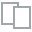
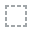
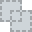
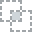
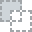
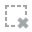
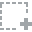
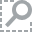
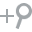
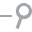
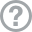
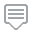
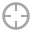
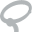
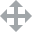
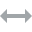
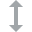
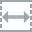
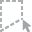
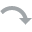
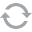
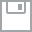
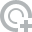
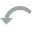
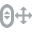
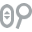
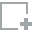
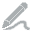
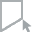
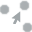
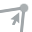
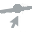

In [36]:
from dataprep.eda import plot_correlation
plot_correlation(Cine)

#### En la tabla anterior podemos observar la correlación de nuestras variables numéricas, vemos que hay tres coeficientes de correlación donde destacamos la correlación de Spearman. Las variables ```Running time ``` y  ```Box office``` cuentan con correlación positiva de 0.19 este valor a pesar de no ser alto es un indicio que nos servirá a la hora de hacer el modelo.

# Análisis Exploratorio


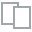
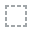
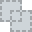
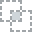
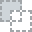
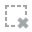
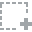
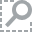
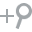
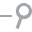
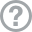
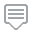
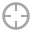
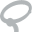
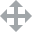
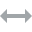
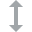
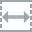
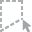
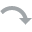
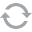
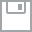
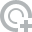
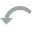
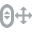
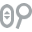
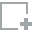
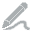
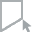
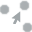
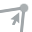
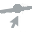

In [30]:
plot(Cine)

- #### En primer momento concentrémonos en el histograma de frecuencia que refleja la duración en minutos del conjunto de filmes, observamos que está sesgada a la derecha lo que nos dice que el conjunto de películas con duración **mayor** a las 97 minutos es mas grande que el conjunto de películas con duración **menor** a 97 minutos.
- #### Llama la antención la gráfica de barras que se encuentra justamente debajo que cuenta la cantidad de filmes lanzados por cada mes, vale la pena destacar que los meses donde hay mayor cantidad son justamente los meses en donde las escuelas y universidades tienen un receso, estos son **Junio** y **Noviembre**.
- #### De igual manera se analiza la variable ```Directed by``` y se observa en la gráfica cuales son los Directores que más han tenido la oportunidad de desempeñarse en la industria, entendemos que cuando un Director cuenta con popularidad se debe en parte a que su trabajo tiene una gran acogida y gusta al público. Siendo así el top 3 de los directores lo encabeza **Robert Stevenson**, le sigue **Norman Tokar** y finalmente **Clyde Geronimi**.
- #### También observamos en el gráfico que relaciona ```Music by``` los Compositores que han tenido más relevencia y destacamos también el top 3. En primer lugar tenemos a **John Debney**, luego a **Paul J. Smith** y de tercero a **George Bruns**.

#### Como recordamos nuestro objetivo explicado al incio consiste en una posible mejora para la plataforma de Disney, por lo tanto un modelo de Aprendizaje no Supervisado como **Clustering** podria servirnos. Para la clusterización podemos ver pares de variables relacionándose y asi elegir cuales nos ayudarían a una mejor segmentación.


In [37]:
figur = px.scatter(Cine, x="Directed by", y="Starring")
figur.show()

#### Arriba vimos las variables ```Starring``` y ```Directed by``` que muestra correlación positiva débil.

#### Enseguida vemos las variables ```Release date``` y ```Running time``` que no muestran correlación.

In [38]:
figur = px.scatter(Cine, x='Running time (int)', y='Release date (datetime)')
figur.show()

#### Las variables que se muestran ahora ```Running time``` y ```Directed by``` tiene un comportamiento muy similar a la anterior, sin correlación.

In [39]:
figur = px.scatter(Cine, x='Running time (int)', y='Directed by')
figur.show()

#### Lo mismo sucede con las variables ```Running time``` y ```Music by``` que vemos enseguida. Y en la gráfica que relaciona ```Running time``` y ```Starring``` no tiene correlación, por lo cual no son las que debemos usar para el **Clustering**.

In [40]:
figur = px.scatter(Cine, x='Running time (int)', y='Music by')
figur.show()

In [41]:
figur = px.scatter(Cine, x='Running time (int)', y='Starring')
figur.show()

#### Como las dos variables ```Box office``` y ```Running time``` estan en escalas diferentes debemos hacer la estandarización y luego graficarlas. Más adelante lo haremos.

# Transformación de variables



#### A continuación vamos a transformar las variables categóricas para introducirlas al modelo, estas son ```Title``` , ```Directed by```, ```Music by``` y ```Starring```.

In [42]:
labelE = LabelEncoder()

In [43]:
enc = OneHotEncoder()

In [44]:
Cine['title'] = labelE.fit_transform(Cine['title'])

In [45]:
Cine['Directed by'] = labelE.fit_transform(Cine['Directed by'])

In [46]:
Cine['Music by'] = labelE.fit_transform(Cine['Music by'])

In [47]:
Cine['Starring'] = labelE.fit_transform(Cine['Starring'])

In [48]:
enc_dfo = pd.DataFrame(enc.fit_transform(Cine[['Mes']]).toarray())

In [49]:
Cine= Cine.join(enc_dfo)

In [50]:
Cine.rename({1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Agos', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}, axis=1, inplace=True)

In [51]:
Cine

,title,Running time (int),Box office (float),Mes,Release date (datetime),Directed by,Starring,Music by,0,Ene,Feb,Mar,Abr,May,Jun,Jul,Agos,Sep,Oct,Nov
0,196,83.0,418000000.0,diciembre,1937-12-21,42,2,41,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,160,88.0,164000000.0,febrero,1940-02-07,13,49,74,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,275,74.0,960000.0,junio,1941-06-27,2,210,41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,55,64.0,1300000.0,octubre,1941-10-23,13,78,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,21,70.0,267000000.0,agosto,1942-08-09,39,71,41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,178,107.0,122700000.0,marzo,2021-03-05,53,148,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
334,46,134.0,223600000.0,mayo,2021-05-18,40,84,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
335,112,95.0,38000000.0,junio,2021-06-13,56,109,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
336,107,127.0,194900000.0,julio,2021-07-24,90,74,61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
Cine = Cine.drop(['Mes', 'Release date (datetime)'], axis=1)

# Estandarización de los datos

#### Para normalizar los datos usaremos el Transformador cuantílico para la distribución de datos examinando usando las dos mas comunes *Normal* y *Uniforme*. También aplicaremos el transformador no paramétrico: Power Transformer especificamente uno de los métodos de la clase de potencia del transformador, el método *yeo-johnson*.

In [53]:
Cine1 = Cine.values[:,1:]

In [54]:
Cine1

array([[8.300e+01, 4.180e+08, 4.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.800e+01, 1.640e+08, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.400e+01, 9.600e+05, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.500e+01, 3.800e+07, 5.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.270e+02, 1.949e+08, 9.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.600e+01, 4.490e+07, 1.160e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [55]:
Uniform=QuantileTransformer(output_distribution='uniform').fit_transform(Cine1)
Uniform

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning:

n_quantiles (1000) is greater than the total number of samples (338). n_quantiles is set to n_samples.



array([[0.16617211, 0.86646884, 0.19287834, ..., 0.        , 0.        ,
        0.        ],
       [0.2462908 , 0.69139466, 0.05637982, ..., 0.        , 0.        ,
        0.        ],
       [0.04747774, 0.00593472, 0.00890208, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41543027, 0.43620178, 0.24332344, ..., 0.        , 0.        ,
        0.        ],
       [0.91394659, 0.74183976, 0.39465875, ..., 0.        , 0.        ,
        0.        ],
       [0.44807122, 0.47032641, 0.52967359, ..., 0.        , 0.        ,
        0.        ]])

(array([ 9.,  8.,  9.,  7., 10.,  8.,  8.,  9.,  8.,  9.,  8.,  9.,  8.,
         8., 10.,  7.,  9.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  8.,  9.,
         8.,  8.,  9.,  8.,  9.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  8.,
         9.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

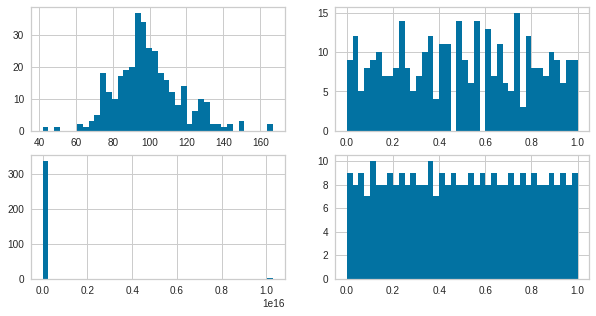

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.hist(Cine1[:,0],bins=40)
plt.subplot(222)
plt.hist(Uniform[:,0],bins=40)
plt.subplot(223)
plt.hist(Cine1[:,1],bins=40)
plt.subplot(224)
plt.hist(Uniform[:,1],bins=40)

In [57]:
 Normal = QuantileTransformer(output_distribution='normal').fit_transform(Cine1)
 Normal

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning:

n_quantiles (1000) is greater than the total number of samples (338). n_quantiles is set to n_samples.



array([[-0.96940288,  1.10985314, -0.8673383 , ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.68620856,  0.49980742, -1.58591037, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-1.66981744, -2.51600244, -2.36966613, ..., -5.19933758,
        -5.19933758, -5.19933758],
       ...,
       [-0.21359803, -0.16060621, -0.69565185, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [ 1.36546539,  0.6490277 , -0.26719697, ..., -5.19933758,
        -5.19933758, -5.19933758],
       [-0.13053593, -0.07444938,  0.07444938, ..., -5.19933758,
        -5.19933758, -5.19933758]])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  4.,
         9., 12., 18., 23., 28., 32., 35., 35., 32., 28., 23., 18., 12.,
         9.,  5.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-5.19933758e+00, -4.93937070e+00, -4.67940382e+00, -4.41943695e+00,
        -4.15947007e+00, -3.89950319e+00, -3.63953631e+00, -3.37956943e+00,
        -3.11960255e+00, -2.85963567e+00, -2.59966879e+00, -2.33970191e+00,
        -2.07973503e+00, -1.81976815e+00, -1.55980127e+00, -1.29983440e+00,
        -1.03986752e+00, -7.79900637e-01, -5.19933758e-01, -2.59966879e-01,
         4.89217555e-11,  2.59966879e-01,  5.19933758e-01,  7.79900637e-01,
         1.03986752e+00,  1.29983440e+00,  1.55980127e+00,  1.81976815e+00,
         2.07973503e+00,  2.33970191e+00,  2.59966879e+00,  2.85963567e+00,
         3.11960255e+00,  3.37956943e+00,  3.63953631e+00,  3.89950319e+00,
         4.15947007e+00,  4.41943695e+00,  4.67940382e+00,  4.93937070e+00,
      

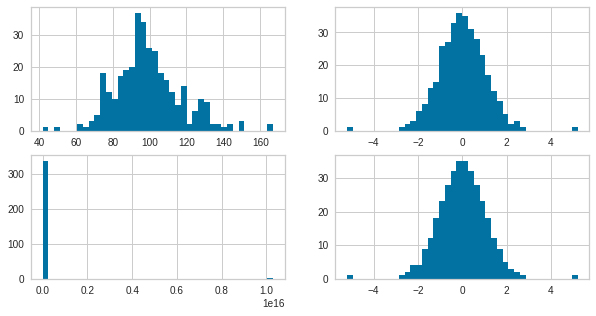

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.hist(Cine1[:,0],bins=40)
plt.subplot(222)
plt.hist(Normal[:,0],bins=40)
plt.subplot(223)
plt.hist(Cine1[:,1],bins=40)
plt.subplot(224)
plt.hist(Normal[:,1],bins=40)

In [59]:
Yeo=PowerTransformer(method='yeo-johnson').fit_transform(Cine1)
Yeo

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning:

divide by zero encountered in log



array([[-0.91045756,  0.        , -1.09145291, ..., -0.36637165,
        -0.31209389, -0.18340977],
       [-0.59735987,  0.        , -1.70773283, ..., -0.36637165,
        -0.31209389, -0.18340977],
       [-1.50814828,  0.        , -2.01007504, ..., -0.36637165,
        -0.31209389, -0.18340977],
       ...,
       [-0.17882338,  0.        , -0.8292778 , ..., -0.36637165,
        -0.31209389, -0.18340977],
       [ 1.5038536 ,  0.        , -0.24102444, ..., -0.36637165,
        -0.31209389, -0.18340977],
       [-0.12077202,  0.        ,  0.17777388, ..., -0.36637165,
        -0.31209389, -0.18340977]])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 338.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

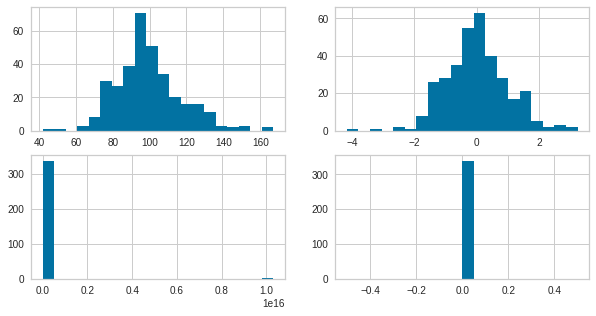

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.hist(Cine1[:,0],bins=20)
plt.subplot(222)
plt.hist(Yeo[:,0],bins=20)
plt.subplot(223)
plt.hist(Cine1[:,1],bins=20)
plt.subplot(224)
plt.hist(Yeo[:,1],bins=20)

### Después de apreciar el comportamiento de los datos, vemos que los datos se ajustan a una distribución *Normal* de "Quantile Transformer".

# Aprendizaje No Supervisado

#### Recordemos que los datos estandarizados están guardados en la variable "Normal" estos son los que introduciremos a nuestro algoritmo no supervisado de Clustering llamado **Kmeans**.

In [61]:
data_df = pd.DataFrame(Normal) ## Convertimos a Data frame los datos estandarizados guardados en "Normal"
## Esta variable será utilizada más adelante

#### Ahora con nuestros datos estandarizados vamos a graficar las dos variables que quedaron pendientes arriba que son  ```Running time``` y ```Box office```.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



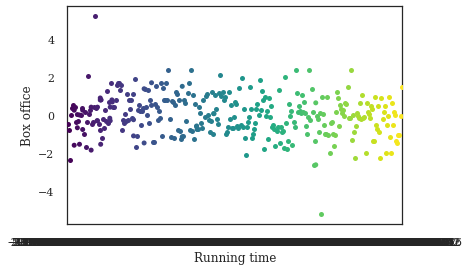

In [112]:
plt.figure(figsize=(6, 4))
sns.swarmplot(y='Box office',x='Running time',data=data_df, palette="viridis")
plt.show()

#### Encontramos en estas variables que los datos están correlacionados, estos son los que servirán para la segmentación.

#### A continuación se hace la suma de cuadrados para luego poder realiza el método del Codo.

In [62]:
sum_of_squared = []
M = range(1,18)
for m in M:
    km = KMeans(n_clusters=m)
    km = km.fit(Normal)
    sum_of_squared.append(km.inertia_)

In [63]:
km.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

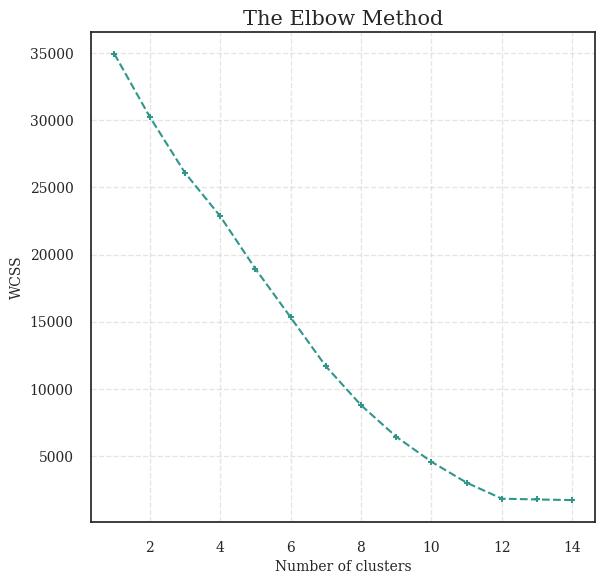

In [86]:

sns.set( style = 'white' )
plt.rc('font', family='serif')

dos = plt.figure( figsize=(6.5,6.5),
           dpi = 100,
           facecolor=c_background
          )
plt.axes().set_facecolor(c_background)

plt.plot(range(1, 15), wscc,
         linestyle = '--', linewidth = 1.5,
        marker = 'P', markersize = 5,
         color = '#2F968B' ,
        label = 'The Elbow Method'
       )


plt.title('The Elbow Method', size = 15, pad = 5)
plt.xlabel('Number of clusters', size = 10)
plt.ylabel('WCSS', size = 10)
plt.tick_params( labelsize = 10 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

#### Por el resultado anterior se puede decir que el **número óptimo de cluster es 12**. Veamos para confirmar el método de Silhouette que considera como el número óptimo de conglomerados, el que maximiza la media del coeficiente de silueta de todas las observaciones.

In [65]:
wscc = []
for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42 )
    kmeans.fit(Normal)
    wscc.append(kmeans.inertia_)
wscc

[34950.83625523337,
 30285.205761459067,
 26107.09044586173,
 22869.76942240261,
 18953.98087309899,
 15333.826213416125,
 11681.92122179997,
 8779.741978412205,
 6427.158636221831,
 4558.954637708632,
 2997.745097745341,
 1807.721400504457,
 1746.9011547821392,
 1701.9016474066623]

In [66]:
silhouette_score(Normal, kmeans.labels_)

0.6527740941222534

In [67]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Normal) for k in range (1,15)]

In [68]:
silhouette_scores = [silhouette_score(Normal, model.labels_) for model in kmeans_per_k[1:]]

In [69]:
silhouette_scores

[0.1747498130861887,
 0.2652617811323883,
 0.3333285903676174,
 0.418517261980408,
 0.5003110366252609,
 0.5798426050688226,
 0.6410671686734458,
 0.6912877553781995,
 0.7319569706985793,
 0.7664248454840491,
 0.7936807934512875,
 0.7159277533488124,
 0.6527740941222534]

In [70]:
silhouette_scores = np.array( silhouette_scores )
silhouette_scores

array([0.17474981, 0.26526178, 0.33332859, 0.41851726, 0.50031104,
       0.57984261, 0.64106717, 0.69128776, 0.73195697, 0.76642485,
       0.79368079, 0.71592775, 0.65277409])

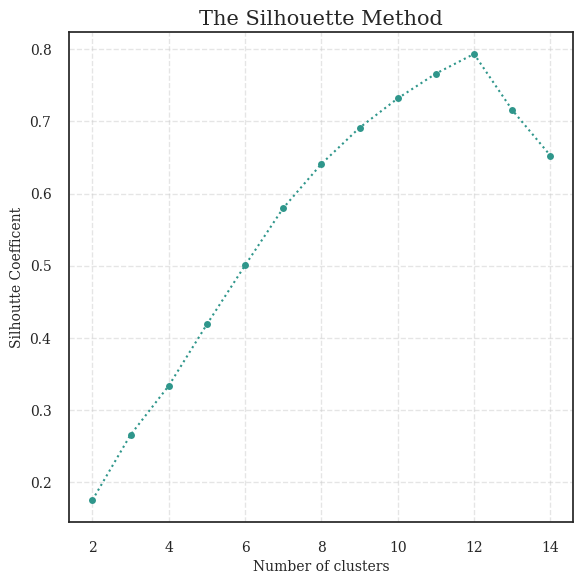

In [88]:
sns.set( style = 'white' )
plt.rc('font', family='serif')

uno = plt.figure( figsize=(6.5, 6.5),
           dpi = 100,
           facecolor=c_background
          )
plt.axes().set_facecolor = c_background

plt.plot(range(2, 15), silhouette_scores,
        linestyle = ':', linewidth = 1.5,
        marker = 'o', markersize = 5,
        color = '#2F968B' ,
        label = 'The Silhoutte Method'
       )

plt.title('The Silhouette Method', size = 15, pad = 5)
plt.xlabel('Number of clusters', size = 10)
plt.ylabel('Silhoutte Coefficent', size = 10)
plt.tick_params( labelsize = 10 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()



#### Efectivamente **el método de Silhouette confirmó que el número optimo es 12**, esto lo sabemos al observar el pico más alto de esta gráfica.

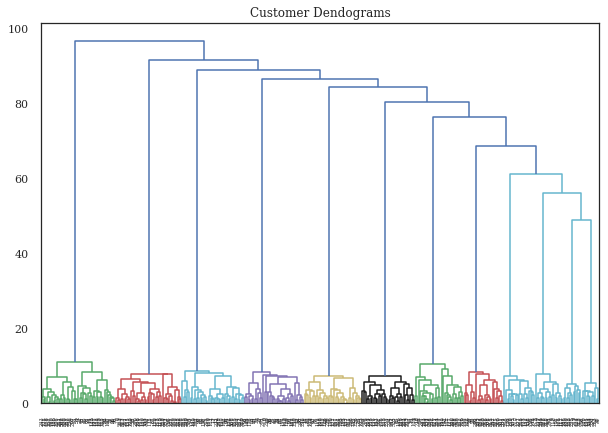

In [91]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(Normal, method='ward'))

In [92]:

 
#Initialize the class object
kmeans = KMeans(n_clusters= 12)
 
#predict the labels of clusters.
label = kmeans.fit_predict(Normal)
 
print(label)

[ 3  0  1  6  9  9  3  8  2 11  7  2  6  0  1  5  4  0  5  3  7  1  1  3
  3  3 10  4  2  7  3 10  4  1  3  8  7  2 10  4  1  5  2  3  4  0  3  5
  9  3 10  9  3  0  1  3  0  1  5  6  1  0  4  1  3  3  7  2  5  3  3  1
  6  5  3  0  1  2  3  1  5  3  0  4  5  5  5  3  3  1  1  2  1  3  0  8
  1  5  3  0  1  5  0  5  4  8  6  1  5 11  2  5  9  1  4  2  1  9  9  2
 10  6  7  1 11  8  5  6  2  3  0  4  8  5  6  2 10  0  8  8  1  5  6  2
  3  0  4  4  8  1  5  9 11  2  3  0  4  8  1  9  6  2  0  4  1  5  9  6
  2  3  4  1  5  2  2  3  0  4  1  5  2  3  0  4  7  5 11  2  3  0  1  5
  6  6 10  0  4  1  5  6  2  2  0  4  4  8  7  7  1  9  2  2  3 10  0  0
  8  1  9  6  2 10  0  4  4  1  5  4 11  6  3 10  0  4  8  7  1  9  6  2
  0  4  7  1  9 11  6  3  0  4  7  1  6  6  6  2  3  0  4  8  7  5  2  2
  2  0  7  1  5 11  2  8  2  4  8  7  1  8  2  5  0  1  9 11  6  0  1  1
  9  2  6  4  7  7  5 11  6  6  3  0  0  7  7  2 10  0  8  8  7  1  7  9
 11  2  0  7  7  6  6  0  1  5  6  2  2  4  1  5  6

In [93]:
data_df["Clus_km"] = label ## Aqui agregamos a mi objeto data_df (que contienen los datos estandarizados
                          ## en formato dataframe una nueva columna, la que dice a que Cluster pertenece cada pelicula

In [114]:
Movie["Clus_km"] = label

In [94]:
data_df.rename ({1: "Running time", 2: "Box office", 7: "Directed by", 8: "Starring", 9: "Music by" }, axis=1, inplace=True)

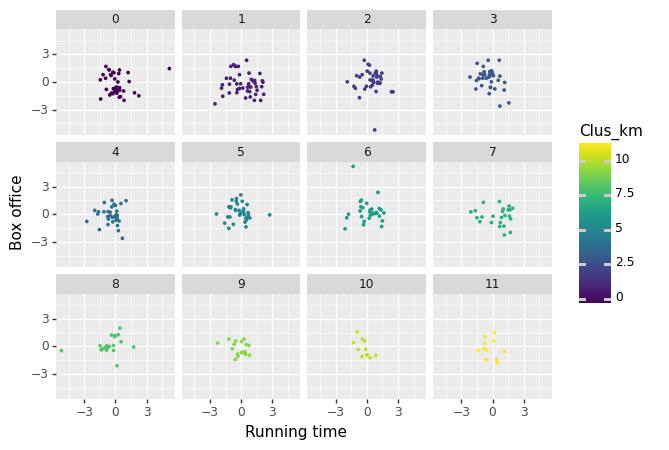

<ggplot: (8791246743609)>

In [110]:
(p9.ggplot(data=data_df,
           mapping=p9.aes(x="Running time",
                          y="Box office",
                          color='Clus_km'))
    + p9.geom_point(shape = ".")
    + p9.facet_wrap("Clus_km")
)

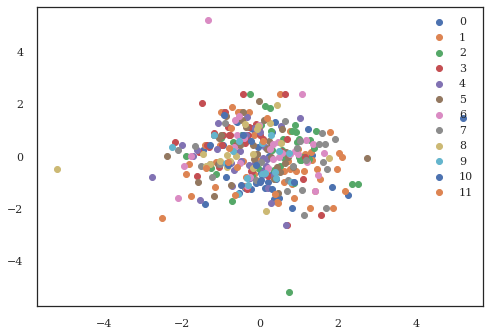

In [111]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Normal[label == i , 1] , Normal[label == i , 2] , label = i)
plt.legend()
plt.show()

#### Con estas visualizaciones conseguimos las segmentaciones deseadas, ahora exploremos para una mejor lectura las variables ```Directed by``` y ```Music by```. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

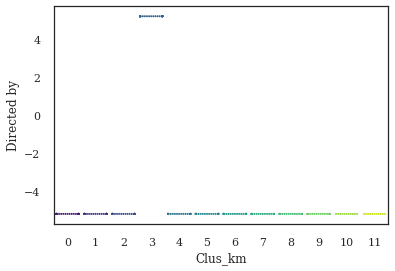

In [116]:
plt.figure(figsize=(6, 4))
sns.swarmplot(y="Directed by",x='Clus_km',data=data_df, size = 2, palette="viridis")
plt.show()

#### Con este gráfico tenemos un hallazgo valioso, debido a que el **Cluster 3** contiene en mayor parte peliculas dirigidas por el **Top 3 de Directores** mencionados en el análisis exploratorio.

#### Esto coloca a este conjunto de filmes en una posición diferente en comparación con los demás porque sabemos la popularidad de estos directores, por esto podrían gustarle al público, de manera que a la vez se pueda retomar aquellos elementos visuales, temáticas y demás que se han ido quedando atrás. 

#### Si en el sistema de recomendación de Disney Plus tiene un enfoque basado en las preferencias de los usuarios tomando en cuenta los directores de sus películas favoritas, se revisa cuales de las películas que hacen parte de este grupo podrian ser de su interés y se procede a recomendarselas

#### Lo mismo aplica para el **Cluster 0** que contiene el Top 3 de Compositores, estas peliculas también podrán ser llamativas para los usuarios y por eso se recomienda tenerlas en cuenta.





/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

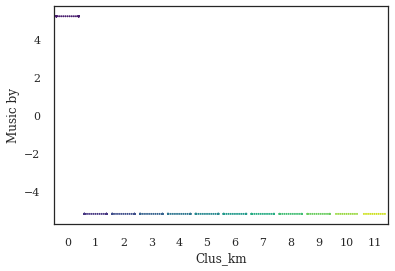

In [119]:
plt.figure(figsize=(6, 4))
sns.swarmplot(y="Music by",x='Clus_km',data=data_df, size = 2, palette="viridis")
plt.show()